In [113]:
import pandas as pd
from matplotlib import pyplot as plt

from utils.metrics import execution_metrics, results_distribution, plot_metrics
from utils.persistent import load_direct_result, load_smcdel_result, NameInfo
from sklearn import metrics as sk_metrics

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Metrics

In [114]:
direct_result = load_direct_result(name_info=NameInfo(
    model_name="gpt-3.5-turbo-0125",
    sample_size=200
))
with_sf_result = load_smcdel_result(name_info=NameInfo(
    model_name="gpt-3.5-turbo-0125",
    sample_size=200,
))
direct_fine_tuning_result = load_direct_result(name_info=NameInfo(
    model_name="ft:gpt-3.5-turbo-0125:personal:withoutsf:9A3WQ1Ca",
    sample_size=200
))
with_sf_fine_tuning_result = load_smcdel_result(name_info=NameInfo(
    model_name="ft:gpt-3.5-turbo-0125:personal:withsf:9A3TMeFR",
    sample_size=200,
))

In [115]:
direct_metrics = execution_metrics(direct_result)  # pd.Series
with_sf_metrics = execution_metrics(with_sf_result)
direct_fine_tuning_metrics = execution_metrics(direct_fine_tuning_result)
with_sf_fine_tuning_metrics = execution_metrics(with_sf_fine_tuning_result)
metrics = pd.concat([
    direct_metrics,
    with_sf_metrics,
    direct_fine_tuning_metrics,
    with_sf_fine_tuning_metrics
], axis=0)
metrics.index = ["direct", "with_sf", "direct_fine_tuning", "with_sf_fine_tuning"]
metrics

,execution_accuracy,auc,execution_rate
direct,0.58,0.57825,0.995
with_sf,0.49,0.57800,0.780
direct_fine_tuning,0.76,0.76000,1.000
with_sf_fine_tuning,0.91,0.89885,0.945


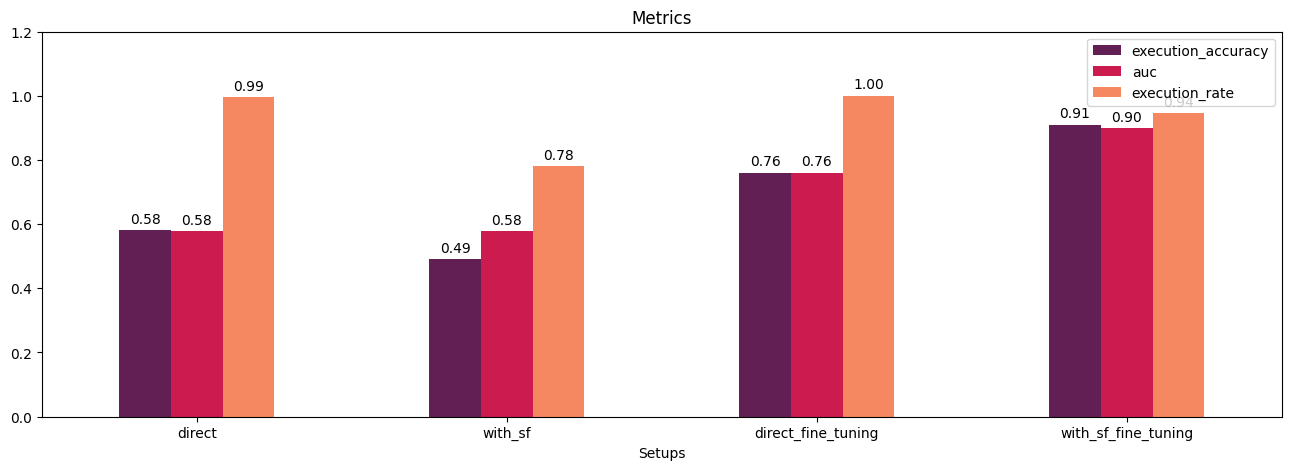

In [116]:
plot_metrics(metrics)

# Results distribution

In [117]:
direct_results_distribution = results_distribution(direct_result)
with_sf_results_distribution = results_distribution(with_sf_result)
direct_fine_tuning_results_distribution = results_distribution(direct_fine_tuning_result)
with_sf_fine_tuning_results_distribution = results_distribution(with_sf_fine_tuning_result)
distribution = pd.DataFrame({
    "direct": direct_results_distribution,
    "with_sf": with_sf_results_distribution,
    "direct_fine_tuning": direct_fine_tuning_results_distribution,
    "with_sf_fine_tuning": with_sf_fine_tuning_results_distribution
}).T
distribution

predicted_label,1,0,-1
direct,0.73,0.265,0.005
with_sf,0.63,0.150,0.220
direct_fine_tuning,0.63,0.370,0.000
with_sf_fine_tuning,0.50,0.445,0.055


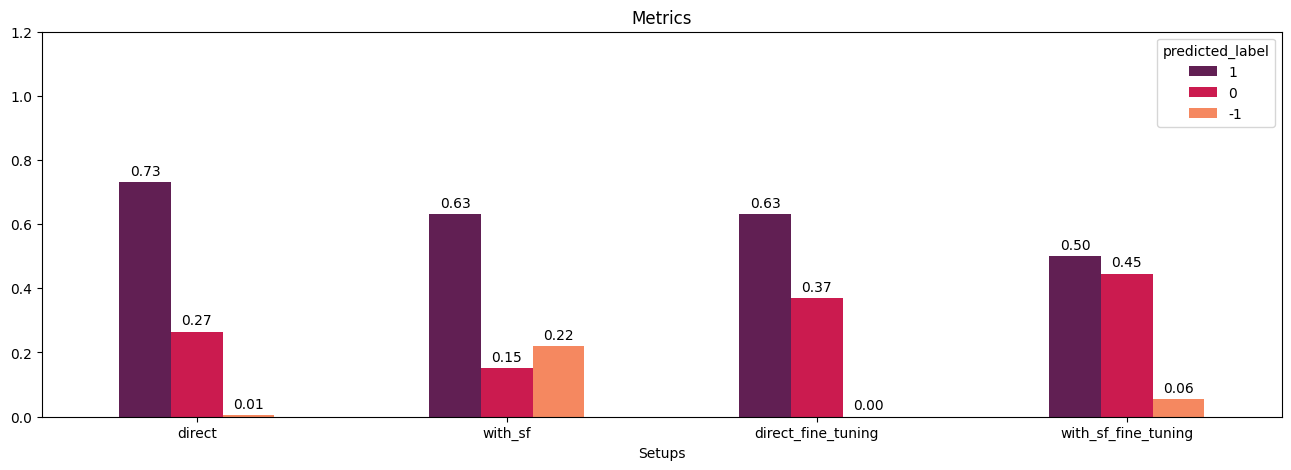

In [118]:
plot_metrics(distribution)